In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

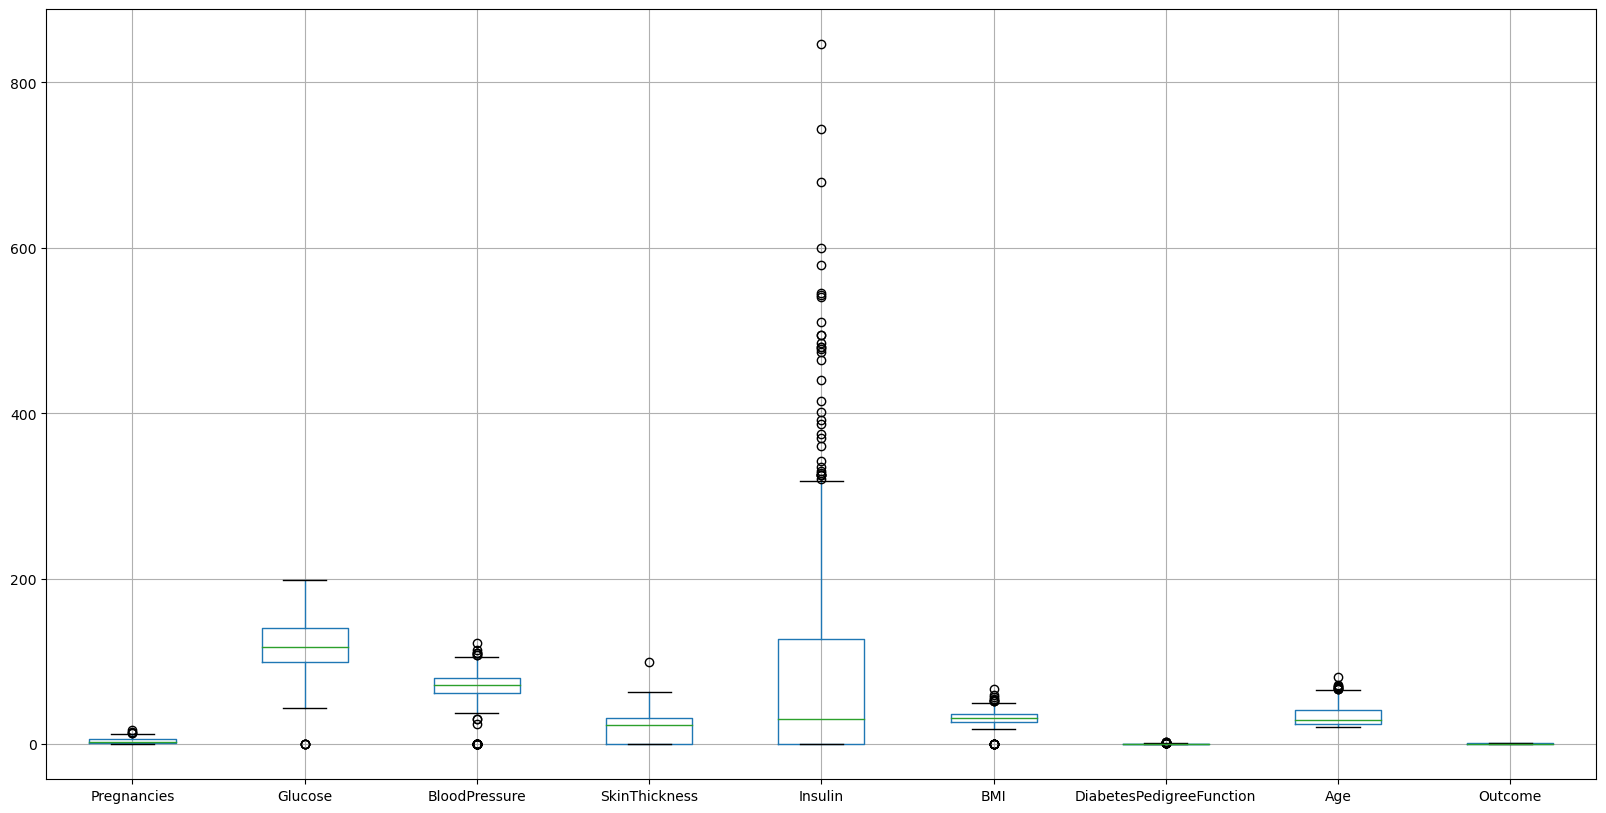

In [7]:
df.boxplot(figsize=(20,10))

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

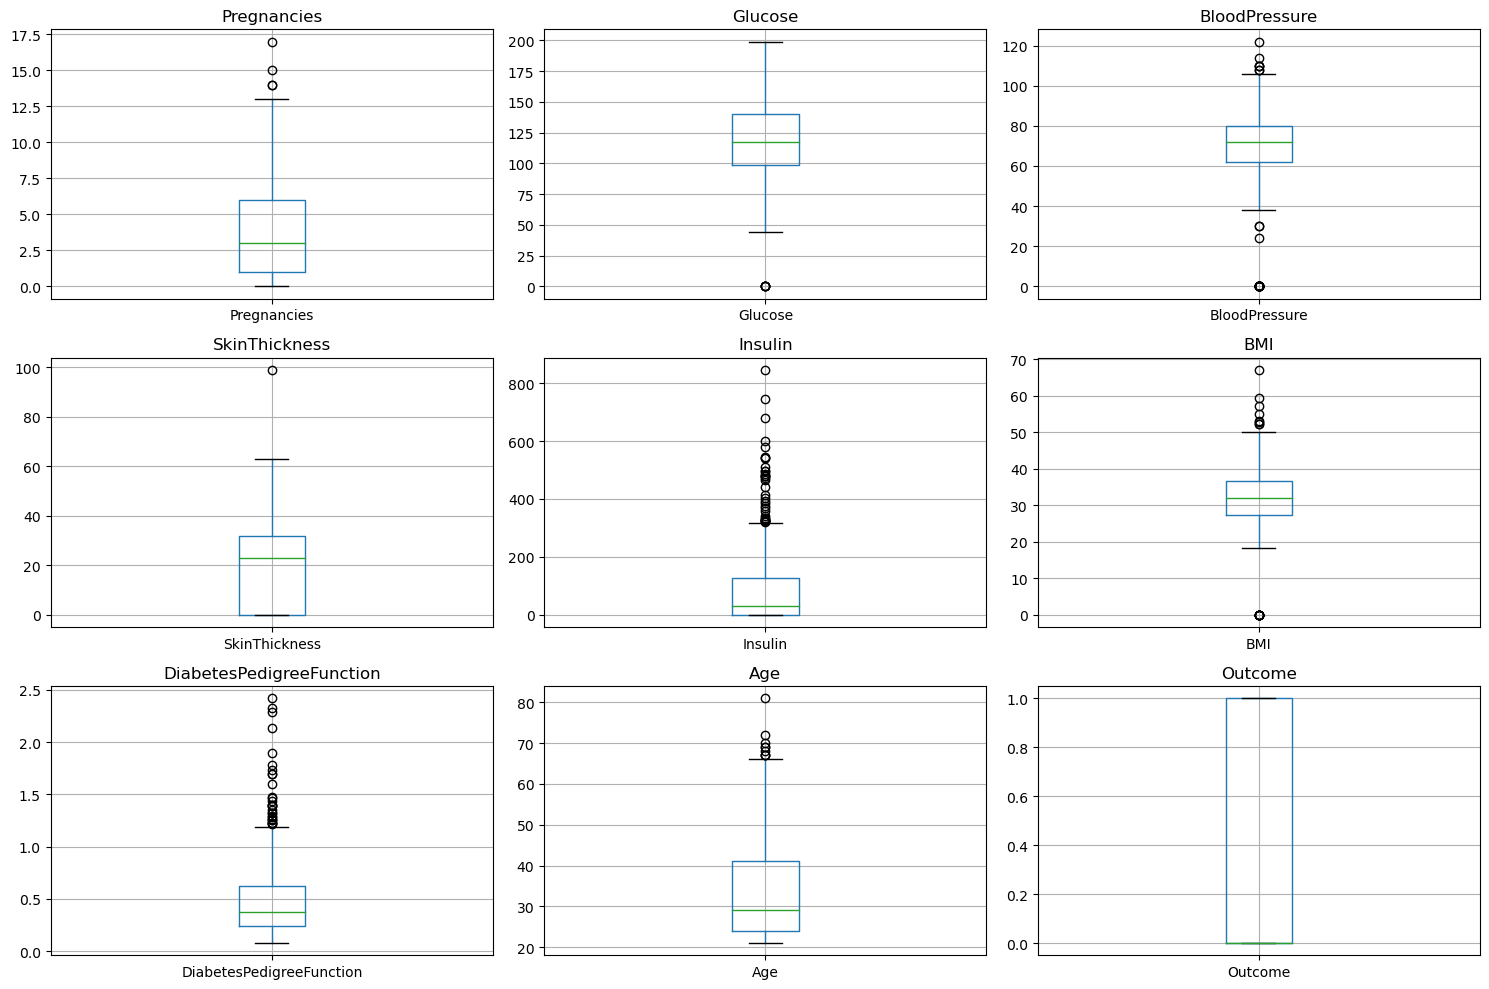

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plotting boxplots for each column
for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [10]:
# scaling

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
x = df.drop(['Pregnancies','Age','Outcome'],axis=1)
y = df[['Pregnancies','Age','Outcome']]

In [14]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [16]:
newx = minmax.fit_transform(x)

In [17]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [18]:
x = pd.DataFrame(newx,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction'])

In [19]:
df = pd.concat([x,y],axis=1)

In [20]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,6,50,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,1,31,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,8,32,1
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,1,21,0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0,33,1
...,...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,10,63,0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,2,27,0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,5,30,0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,1,47,1


In [21]:
# RANDOM FOREST ALGORITHM USING CLASSIFIER

In [22]:
x= df.drop('Outcome',axis=1)
x1 = pd.DataFrame(x)
y = df['Outcome']
y1 = pd.DataFrame(y)

In [24]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [25]:
print(x1_train)
print(x1_test)
print(y1_test)
print(y1_train)

      Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
357  0.648241       0.000000       0.303030  0.000000  0.594635   
73   0.648241       0.704918       0.202020  0.319149  0.523100   
352  0.306533       0.672131       0.282828  0.000000  0.512668   
497  0.407035       0.590164       0.151515  0.089835  0.448584   
145  0.512563       0.614754       0.232323  0.000000  0.000000   
..        ...            ...            ...       ...       ...   
71   0.698492       0.524590       0.353535  0.165485  0.426230   
106  0.482412       1.000000       0.000000  0.000000  0.333830   
270  0.507538       0.704918       0.373737  0.000000  0.679583   
435  0.708543       0.000000       0.000000  0.000000  0.631893   
102  0.628141       0.786885       0.000000  0.000000  0.335320   

     DiabetesPedigreeFunction  Pregnancies  Age  
357                  0.209650           13   44  
73                   0.065329            4   23  
352                  0.070453            3   

In [26]:
from sklearn.ensemble import RandomForestClassifier
RTC = RandomForestClassifier(random_state=42)

In [27]:
model = RTC.fit(x1_train,y1_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [28]:
y1_pred = model.predict(x1_test)

In [29]:
# validating with accuracy score

from sklearn.metrics import accuracy_score
print("the accuracy score is:", accuracy_score(y1_test,y1_pred))

the accuracy score is: 0.7291666666666666


In [30]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,6,50
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,1,31
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,8,32
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,1,21
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0,33


In [32]:
model.predict([[0.743719,	0.590164,	0.353535,	0.000000,	0.500745,	0.234415,	6,	50]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [33]:
model.predict([[0.447236,0.540984,	0.232323,	0.111111,	0.418778,	0.038002,	1,	21]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)